In [17]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn 
import scipy

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("auto-mpg.csv")

df.head(    )

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   brand         398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [9]:
columnas=df.columns

for colum in columnas:
    print(f"{colum} : {df[colum].unique()}")

mpg : [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
cylinders : [8 4 6 3 5]
displacement : [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231. 

In [11]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [12]:
df['brand'] = df['car name'].str.split().str[0]

In [ ]:
df["horsepower"]

In [14]:
df['brand'].unique()


array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [15]:
brand_corrections = {
    'chevy': 'chevrolet',
    'chevroelt': 'chevrolet',
    'toyouta': 'toyota',
    'maxda': 'mazda',
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'mercedes': 'mercedes-benz',
    'hi': 'honda' 
}

df['brand'] = df['brand'].replace(brand_corrections)

In [16]:
for colum in columnas:
    print(f"{colum} : {df[colum].isna().sum()}")

mpg : 0
cylinders : 0
displacement : 0
horsepower : 6
weight : 0
acceleration : 0
model year : 0
origin : 0
car name : 0


In [23]:
df=df.drop(columns="car name")

In [24]:
df = pd.get_dummies(df, columns=['brand'], drop_first=True)

## Vamos a ver con cuantosvecimos es más optimo imputar los nan 

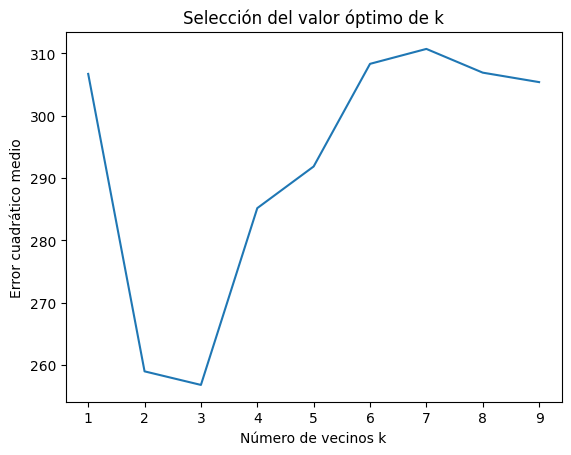

El valor óptimo de k es: 3


In [25]:
X = df.drop(columns=['horsepower',])  
y = df['horsepower']


df_no_nan = df.dropna(subset=['horsepower'])
df_nan = df[df['horsepower'].isna()]


X_no_nan = df_no_nan.drop(columns=['horsepower'])
y_no_nan = df_no_nan['horsepower']


X_train, X_test, y_train, y_test = train_test_split(X_no_nan, y_no_nan, test_size=0.2, random_state=42)


errors = []
k_range = range(1, 10)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    errors.append(-score.mean())

plt.plot(k_range, errors)
plt.xlabel('Número de vecinos k')
plt.ylabel('Error cuadrático medio')
plt.title('Selección del valor óptimo de k')
plt.show()

optimal_k = k_range[np.argmin(errors)]
print(f'El valor óptimo de k es: {optimal_k}')

In [27]:
imputer = KNNImputer(n_neighbors=optimal_k)

imputed_data = imputer.fit_transform(df)

df['horsepower'] = imputed_data[:, df.columns.get_loc('horsepower')]

df.to_csv('auto-mpg-limpio-imputado.csv', index=False)